# Exploratory Data Analysis

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
# First five rows of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Check for missing values
df.isnull().values.any()

False

In [6]:
# Feature counts and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Convert categorical variables to numeric
# Store mappings of labels to digits
mappings = {'Sex':{'M':1, 'F':0},
            'ChestPainType': {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3},
            'RestingECG': {'Normal': 0, 'LVH': 1, 'ST': 2}, 
            'ExerciseAngina': {'N': 0, 'Y': 1}}
num_df = df.copy()
for col in  df.columns:
    if num_df[col].dtype == 'object':
        num_df[col] = num_df[col].astype('category').cat.codes
    else:
        continue

In [8]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [9]:
num_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [10]:
# Normalize scale of each variable for ML model input
from sklearn import preprocessing
names = num_df.columns
num_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df), columns=names)
num_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


In [11]:
# Find which features have highest correlation with target (HeartDisease)
'''
for each feature:
    - find correlation between target and feature
    - put correlation in correlations list
- sort by correlation
'''
dict_corr = num_df[num_df.columns[1:]].corr()['HeartDisease'][:]
dict_corr = dict(dict_corr)
sorted_corr = dict(sorted(dict_corr.items(), key=lambda item: item[1]))
sorted_corr

{'ST_Slope': -0.5587707148497032,
 'MaxHR': -0.40042076946318844,
 'ChestPainType': -0.38682769426256647,
 'Cholesterol': -0.2327406389270102,
 'RestingECG': 0.057384357013450675,
 'RestingBP': 0.10758898037140363,
 'FastingBS': 0.2672911861103008,
 'Sex': 0.30544491596313866,
 'Oldpeak': 0.4039507220628859,
 'ExerciseAngina': 0.4942819918242627,
 'HeartDisease': 1.0}

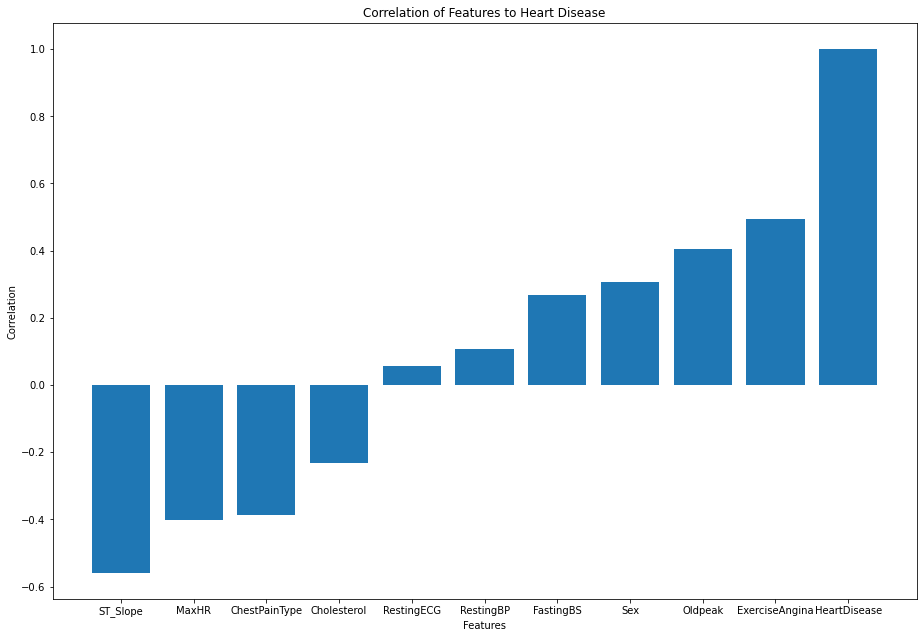

In [12]:
# Graphically confirm feature correlations
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_corr.keys(), sorted_corr.values())
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Features to Heart Disease')
plt.show()

In [13]:
# Generate Heatmap to assess cross-variable correlation for another visualization
corr = num_df.corr()
corr.style.background_gradient(cmap='Spectral')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


# Feature Selection/Engineering

In [14]:
# Select features with positive correlation > 0.0 -- arbitarily set
new_features = [feature for feature in sorted_corr.keys() if sorted_corr[feature] > 0.0]
new_num_df = num_df[new_features]
new_num_df.head()

,RestingECG,RestingBP,FastingBS,Sex,Oldpeak,ExerciseAngina,HeartDisease
0,0.5,0.70,0.0,1.0,0.295455,0.0,0.0
1,0.5,0.80,0.0,0.0,0.409091,0.0,1.0
2,1.0,0.65,0.0,1.0,0.295455,0.0,0.0
3,0.5,0.69,0.0,0.0,0.465909,1.0,1.0
4,0.5,0.75,0.0,1.0,0.295455,0.0,0.0


# Machine Learning Model Application

In [15]:
# Used for cross validating models to obtain holistic picture of model performance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
labels = ['NoHeartDisease','HeartDisease']
best_scores={}

In [16]:
# Split dataset into features and labels
X = new_num_df.drop('HeartDisease',1)
y = new_num_df['HeartDisease']

# Split dataset into training and testing; training used to tune parameters and fit models, test used to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

## k-Nearest Neighbor (kNN)

In [17]:
# Determine optimal K value for kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,200)
scores = {}
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores[k] = cross_val_score(clf,X_train,y_train, cv=10).mean()
opt_k = max(scores, key=scores.get)

Optimal K: 13
Optimal training accuracy: 0.7944951923076923


Text(13, 0.7944951923076923, 'Optimal K')

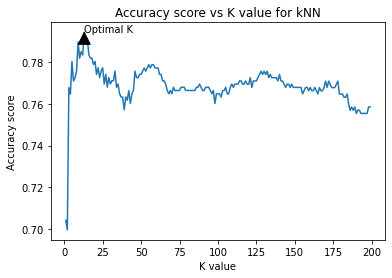

In [77]:
print("Optimal K: %d" % opt_k)
print("Optimal training accuracy: "+ str(scores[opt_k]))
plt.plot(scores.keys(), scores.values())
plt.title('Accuracy score vs K value for kNN')
plt.xlabel('K value')
plt.ylabel('Accuracy score')
plt.annotate(text='Optimal K',xy=(opt_k,scores[opt_k]),arrowprops=dict(facecolor='black',shrink=0.05))

In [19]:
# Test kNN with optimal K on testing dataset
opt_knn = KNeighborsClassifier(n_neighbors=opt_k).fit(X_train,y_train)
best_knn_pred = opt_knn.predict(X_test)
best_knn_score = opt_knn.score(X_test,y_test)
best_scores['knn'] = best_knn_score
print('kNN testing score: %f' % best_knn_score)

kNN testing score: 0.782609


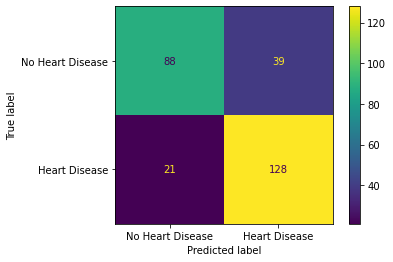

In [20]:
# Plot confusion matrix for kNN with optimal K
cm = metrics.confusion_matrix(best_knn_pred,y_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease','Heart Disease'])
disp.plot()

[]

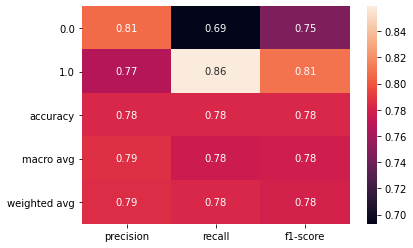

In [21]:
# Plot classification report for kNN
knn_report = metrics.classification_report(best_knn_pred,y_test,output_dict=True)
knn_report = sns.heatmap(pd.DataFrame(knn_report).iloc[:-1].T, annot=True)
knn_report.plot()

## Multi-Layer Perceptron

In [22]:
# Find best specified hyperparameters for MLP with GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# Ignore sklearn warnings
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [49]:
mlp = MLPClassifier(random_state=0)
# Define which hyperparameters will be tested
parameter_grid = {
    "hidden_layer_sizes": [(10,30,10),(20,)],
    'activation': ['logistic','tanh','relu'],
    'solver': ['lbfgs','adam'],
    'alpha': [0.0001,0.1],
    'learning_rate': ['constant','adaptive']
}
clf = GridSearchCV(mlp,param_grid=parameter_grid,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'adam']})

In [101]:
# Find best parameters, use for scoring
print('Best params: ', clf.best_params_ )

Best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [104]:
# Find scores for MLP with best parameters
best_mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', alpha=0.1, learning_rate='constant', solver='lbfgs',random_state= )
best_mlp.fit(X_train,y_train)
mlp_pred = best_mlp.predict(X_test)
mlp_score = best_mlp.score(X_test,y_test)
print('MLP testing score: ', mlp_score)
best_scores['mlp'] = mlp_score

MLP testing score:  0.7898550724637681


[]

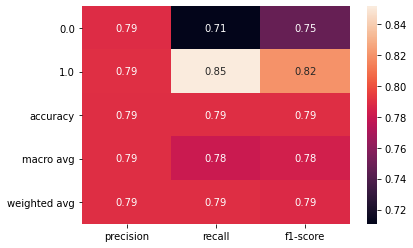

In [110]:
# Plot classification report for MLP
mlp_report = metrics.classification_report(mlp_pred,y_test,output_dict=True)
mlp_report = sns.heatmap(pd.DataFrame(mlp_report).iloc[:-1].T, annot=True)
mlp_report.plot()

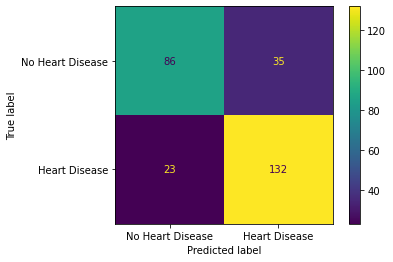

In [111]:
mlp_cm = metrics.confusion_matrix(mlp_pred,y_test)
mlp_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['No Heart Disease','Heart Disease'])
mlp_disp.plot()

## Support Vector Machine

In [58]:
from sklearn.svm import SVC
# Use GridSearchCV to find optimal hyperparameters
param_space = {
    'C': [0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf','poly','sigmoid']
}
svm_c = SVC()
grid = GridSearchCV(svm_c, param_space, cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [59]:
# Find best parameters for SVM model, use to predict on test set
print('Best params for SVM: ', grid.best_params_)

Best params for SVM:  {'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [60]:
opt_svm = SVC(C=1, gamma=1, kernel='poly')
opt_svm.fit(X_train,y_train)
svm_pred = opt_svm.predict(X_test)
svm_score = opt_svm.score(X_test,y_test)
print('SVM testing accuracy: ',svm_score)
best_scores['svm'] = svm_score

SVM testing accuracy:  0.7934782608695652


[]

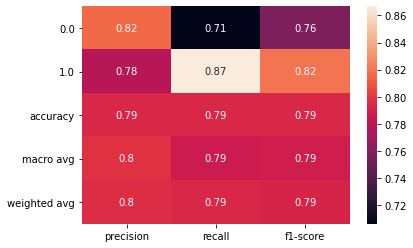

In [61]:
# Plot classification report for SVM
svm_report = metrics.classification_report(svm_pred,y_test,output_dict=True)
svm_report = sns.heatmap(pd.DataFrame(svm_report).iloc[:-1].T, annot=True)
svm_report.plot()

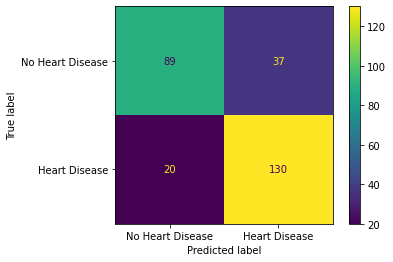

In [62]:
svm_cm = metrics.confusion_matrix(svm_pred,y_test)
svm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['No Heart Disease','Heart Disease'])
svm_disp.plot()

## Ensemble learning method: Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
# Using GridSearchCV to find optimal parameters
param_space = {
    'learning_rate': [0.01,0.1,1,10],
    'n_estimators':[10,50,100,200],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,5],
    'max_depth': [3,5,8],
    'max_features': ['log2','sqrt'],
    'criterion':['friedman_mse','squared_error','mse'],
}
clf = GridSearchCV(GradientBoostingClassifier(random_state=0),param_space,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [35]:
print("Best GB parameters: ", clf.best_params_)

Best GB parameters:  {'criterion': 'mse', 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [107]:
# Test GB classifier on test set
gbc= GradientBoostingClassifier(criterion='mse',learning_rate=0.01,max_depth=3,max_features='log2', min_samples_leaf=5,min_samples_split=2, n_estimators=50, random_state=0)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test,y_test)
print("Test accuracy of GBC: ", gbc_score)
best_scores['gbc']=gbc_score

Test accuracy of GBC:  0.8043478260869565


[]

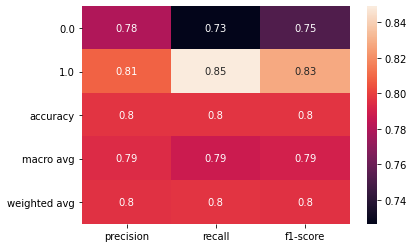

In [37]:
# Plot classification report for GBC
gbc_report = metrics.classification_report(gbc_pred,y_test,output_dict=True)
gbc_report = sns.heatmap(pd.DataFrame(gbc_report).iloc[:-1].T, annot=True)
gbc_report.plot()

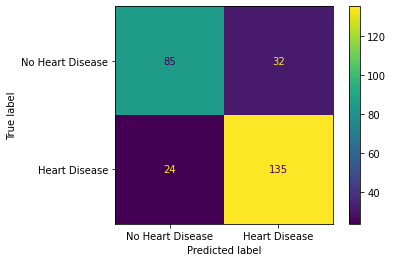

In [38]:
gbc_cm = metrics.confusion_matrix(gbc_pred,y_test)
gbc_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=['No Heart Disease','Heart Disease'])
gbc_disp.plot()

{'knn': 0.782608695652174,
 'mlp': 0.7898550724637681,
 'svm': 0.7934782608695652,
 'gbc': 0.8043478260869565}

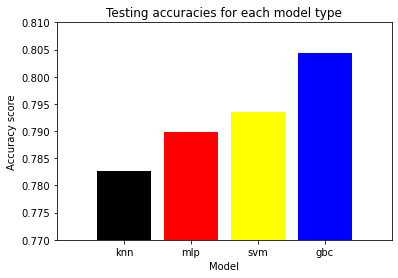

In [109]:
plt.bar(best_scores.keys(),best_scores.values(),color=['black','red','yellow','blue'])
plt.axis([-1,4,0.77,0.81])
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.title('Testing accuracies for each model type')
best_scores